## Loading the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("C:\\Users\\PC\\Documents\\DA\\project\\weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.shape

(145460, 23)

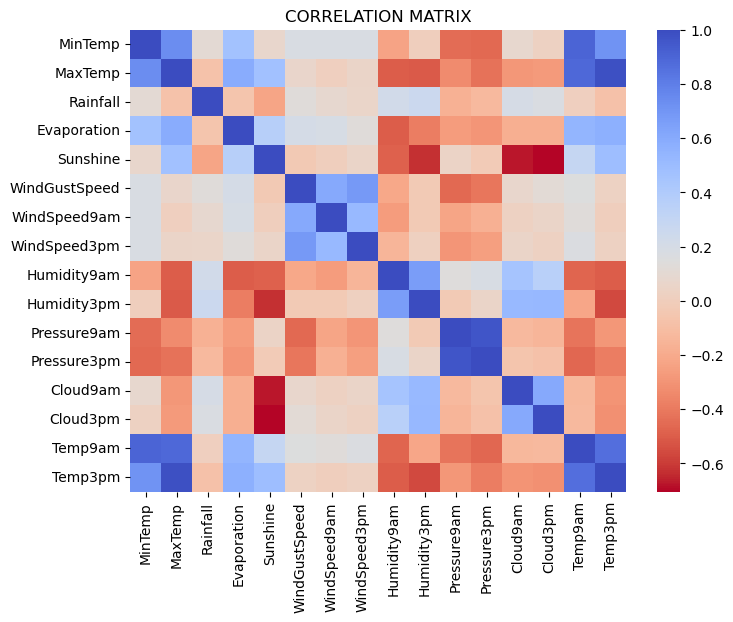

In [7]:
plt.figure(figsize=(8,6))
plt.title('CORRELATION MATRIX')
sns.heatmap(df.corr(),cmap='coolwarm_r');

### We can see that the correlation between the variables are very less.

## HISTOGRAMS

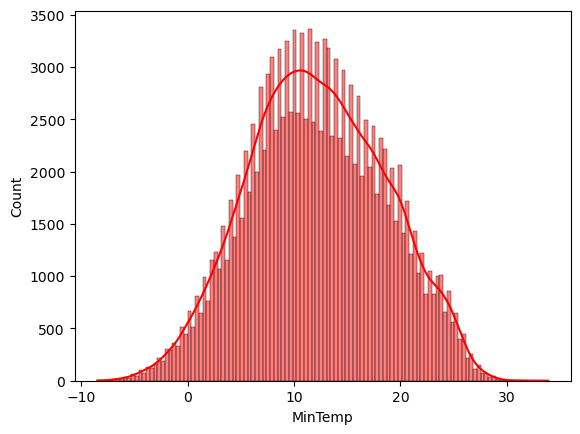

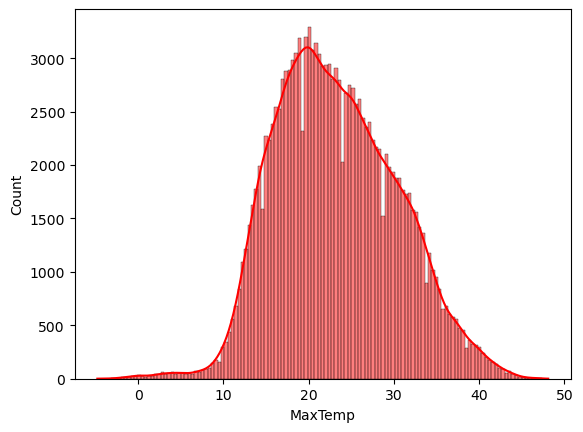

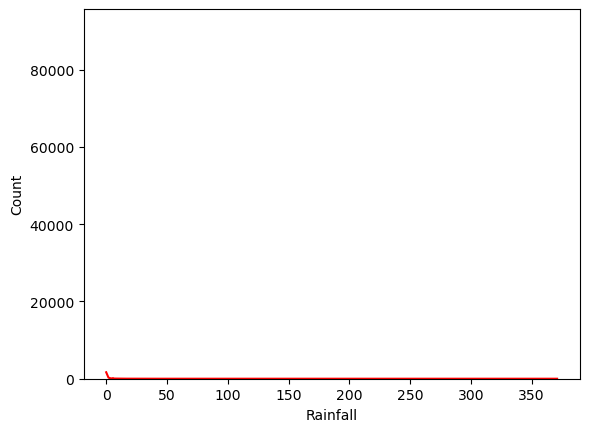

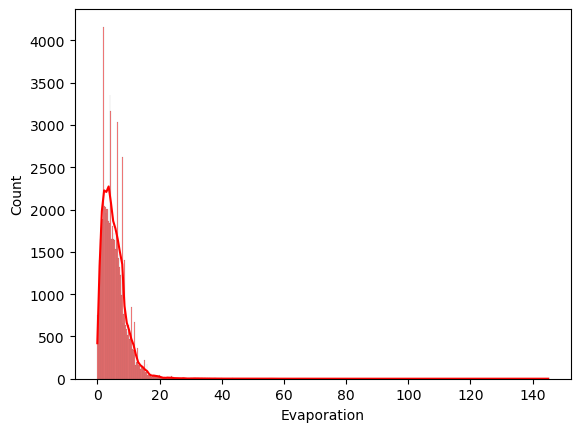

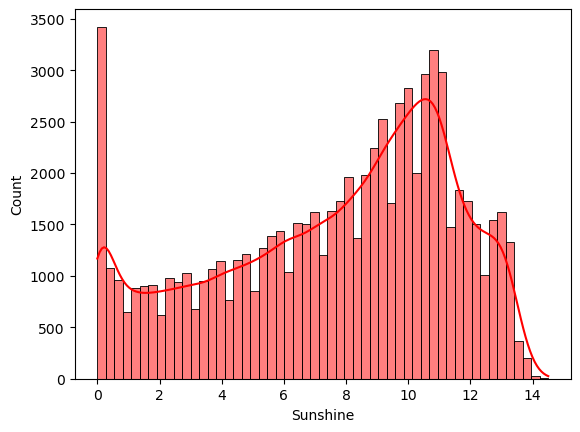

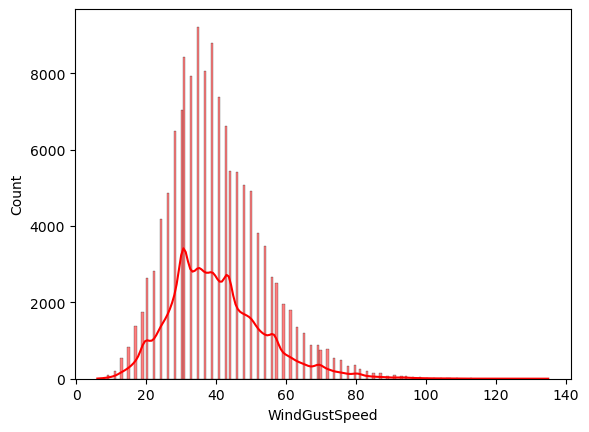

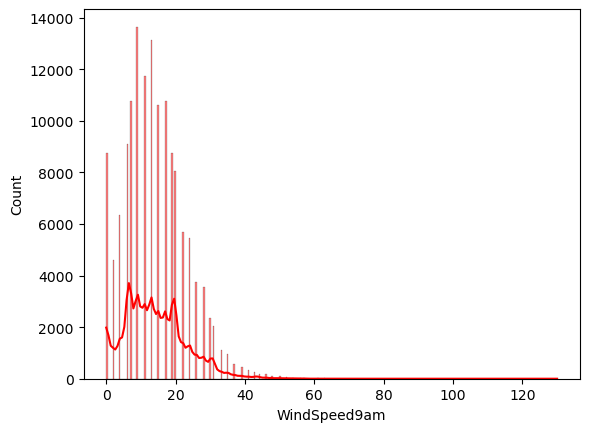

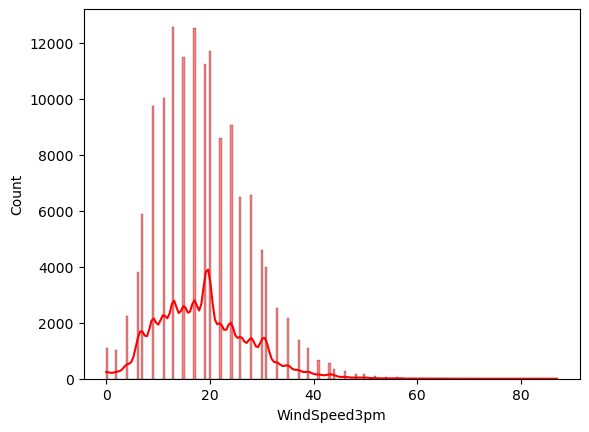

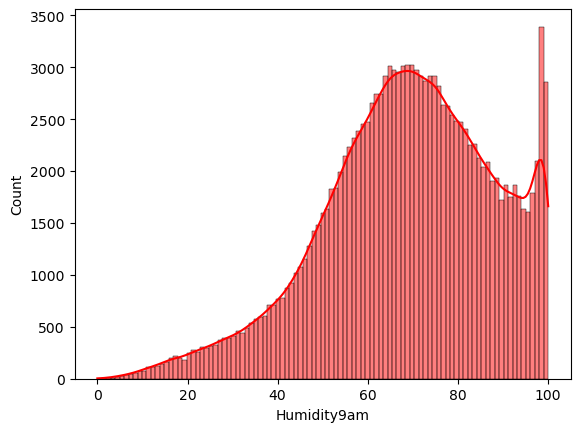

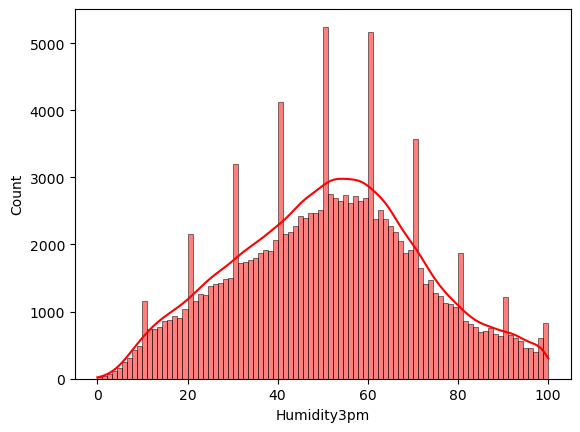

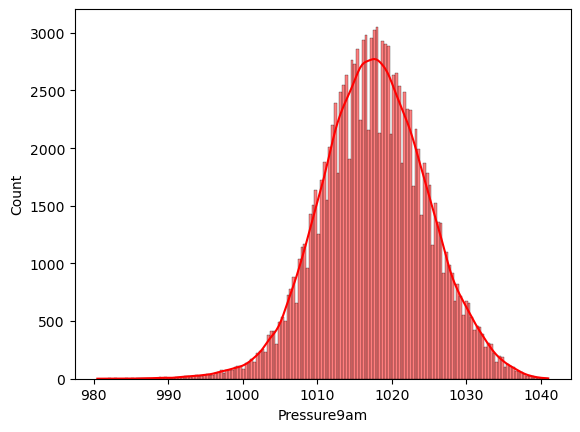

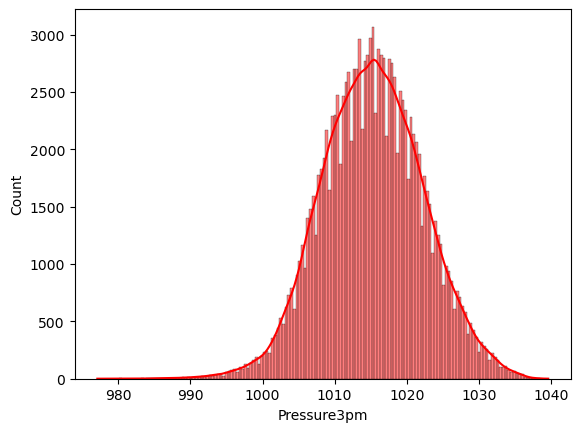

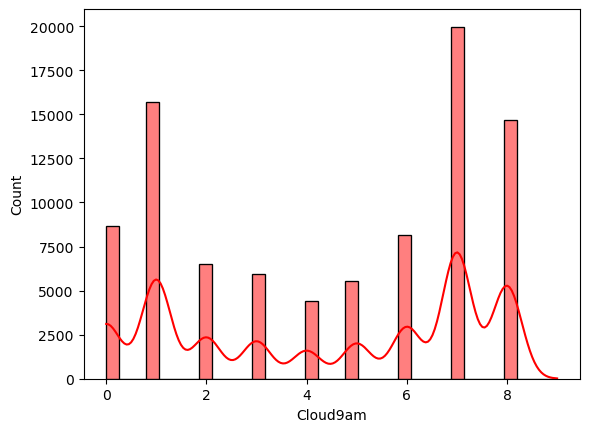

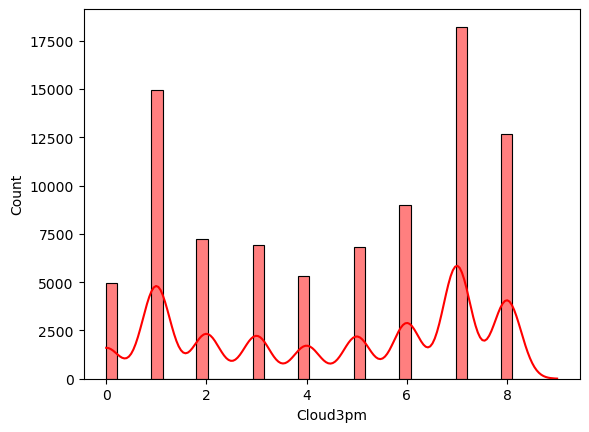

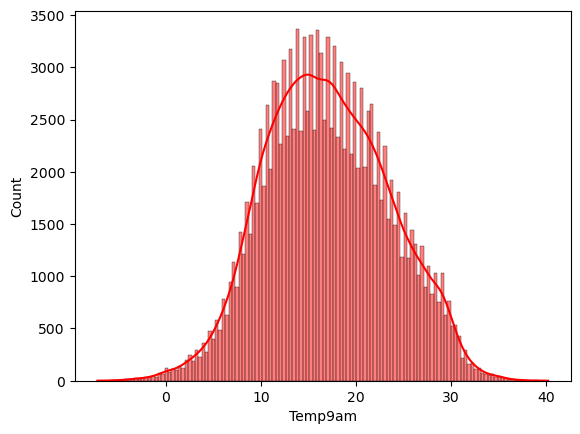

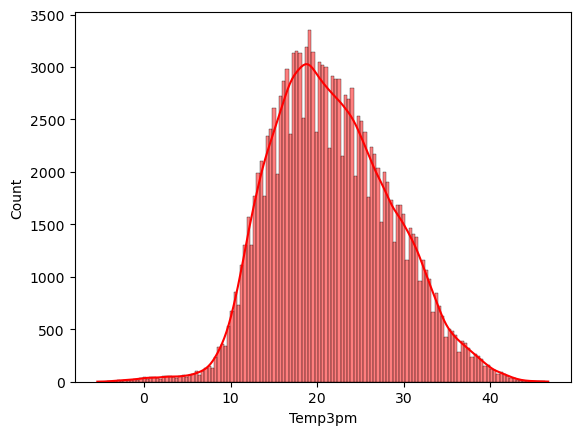

In [8]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(df,x=df[i],kde = True, color = 'red')
        plt.show();

### We can see there is slight skewness in data.

In [9]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [10]:
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True)

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [13]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [14]:
df.MinTemp.fillna(df.MinTemp.mean(),inplace=True)
df.MaxTemp.fillna(df.MaxTemp.mean(),inplace=True)
df.Rainfall.fillna(df.Rainfall.mean(),inplace=True)
#df.WindGustDir.fillna(df.WindGustDir.mean(),inplace=True)
df.WindGustSpeed.fillna(df.WindGustSpeed.mean(),inplace=True)
#df.WindDir9am.fillna(df.WindDir9am.mean(),inplace=True)
#df.WindDir3pm.fillna(df.WindDir3pm.mean(),inplace=True)
df.WindSpeed9am.fillna(df.WindSpeed9am.mean(),inplace=True)
df.WindSpeed3pm.fillna(df.WindSpeed3pm.mean(),inplace=True)
df.Humidity9am.fillna(df.Humidity9am.mean(),inplace=True)
df.Humidity3pm.fillna(df.Humidity3pm.mean(),inplace=True)
df.Pressure9am.fillna(df.Pressure9am.mean(),inplace=True)
df.Pressure3pm.fillna(df.Pressure3pm.mean(),inplace=True)
df.Temp9am.fillna(df.Temp9am.mean(),inplace=True)
df.Temp3pm.fillna(df.Temp3pm.mean(),inplace=True)
#df.RainToday.fillna(df.RainToday.mean(),inplace=True)
#df.RainTomorrow.fillna(df.RainTomorrow.mean(),inplace=True)

In [15]:
df.isnull().mean()*100

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [16]:
df.dropna(inplace=True)

# OUTLIER TREATMENT
# CHECKING THE BOX PLOT

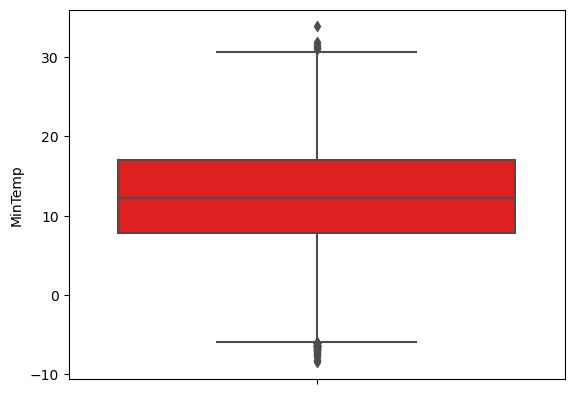

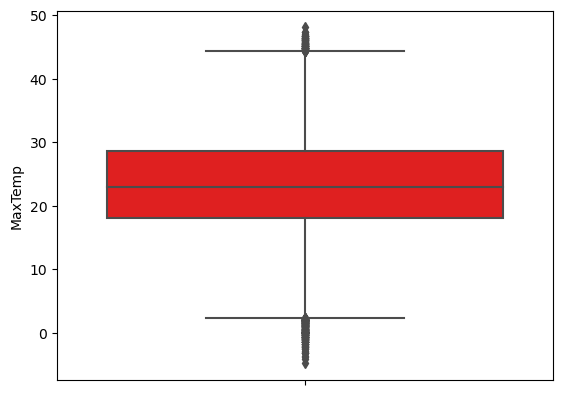

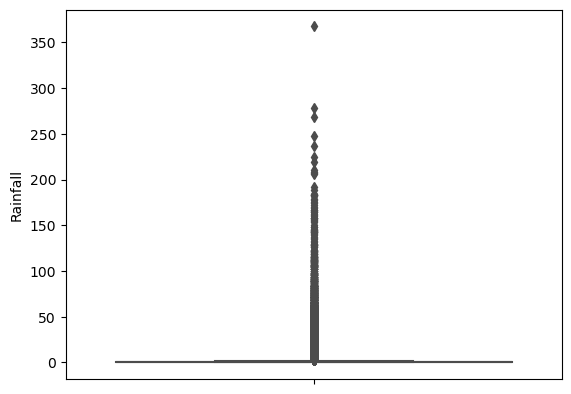

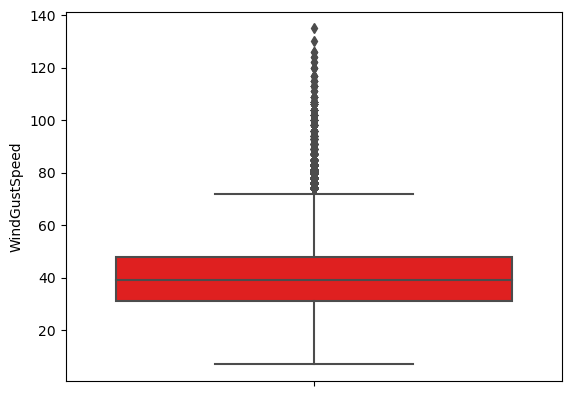

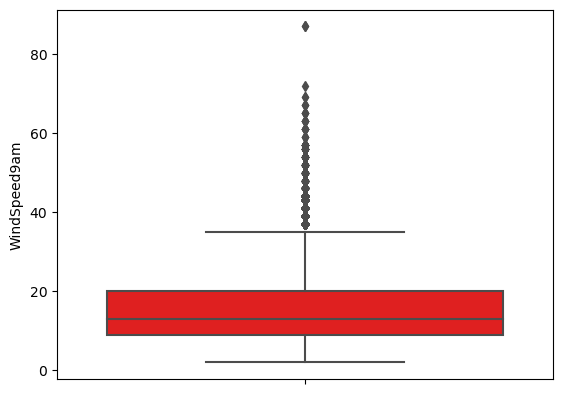

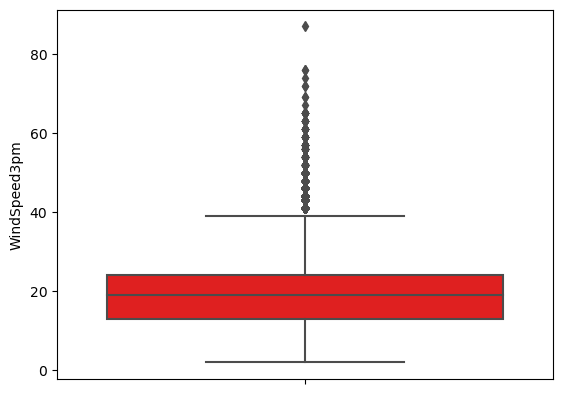

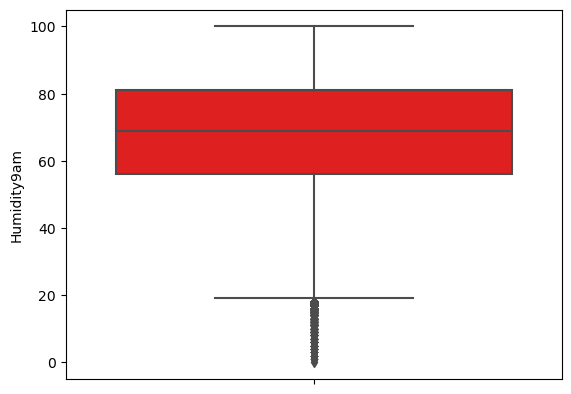

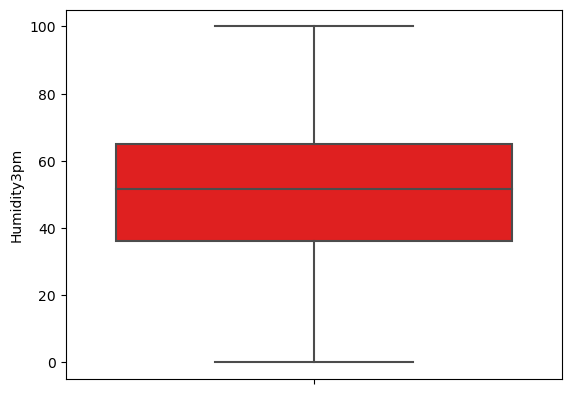

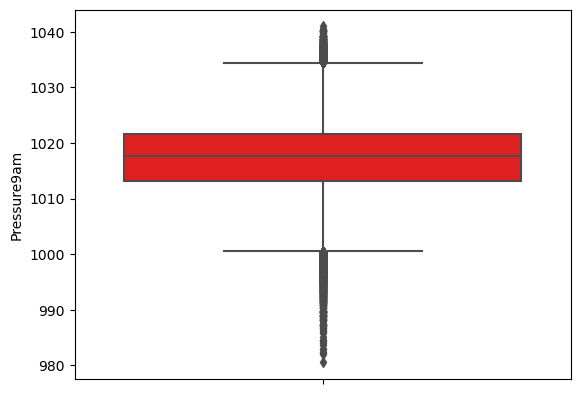

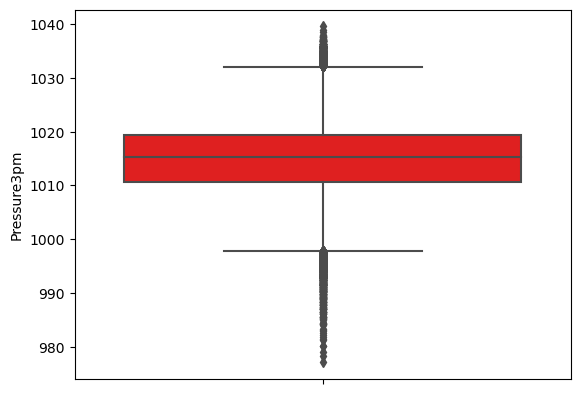

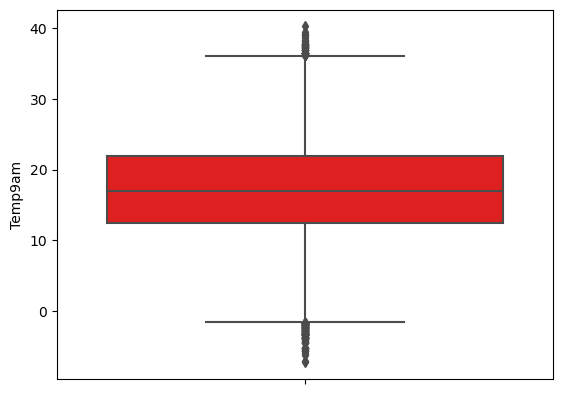

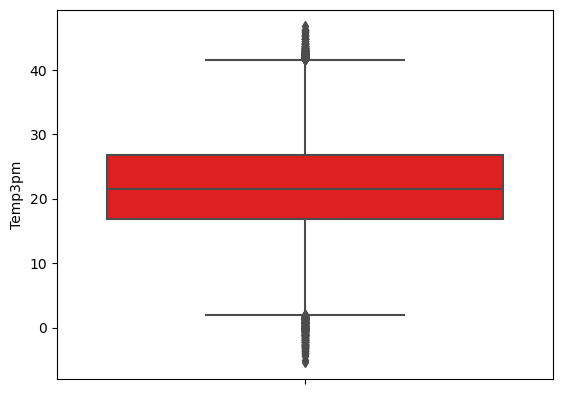

In [17]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i], color = 'red')
        plt.show();

### Setting the outlier limits

In [18]:
def outlier_limit(col):
    q3,q1 = np.nanpercentile(col,[75,25])
    iqr = q3- q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    return ul,ll

In [19]:
for i in df.columns:
    if df[i].dtype !='object':
        ul,ll= outlier_limit(df[i])
        df[i] = np.where((df[i]>ul)|(df[i]<ll),np.nan,df[i])

In [20]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           0.045267
MaxTemp           0.254628
Rainfall         17.999353
WindGustDir       0.000000
WindGustSpeed     2.361167
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      1.657910
WindSpeed3pm      1.817153
Humidity9am       1.277181
Humidity3pm       0.000000
Pressure9am       1.671651
Pressure3pm       1.421065
Temp9am           0.164902
Temp3pm           0.443780
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

In [21]:
df.dropna(inplace=True)

## LETS PLOT THE BARPLOT AGAIN TO SEE THE DIFFERENCE

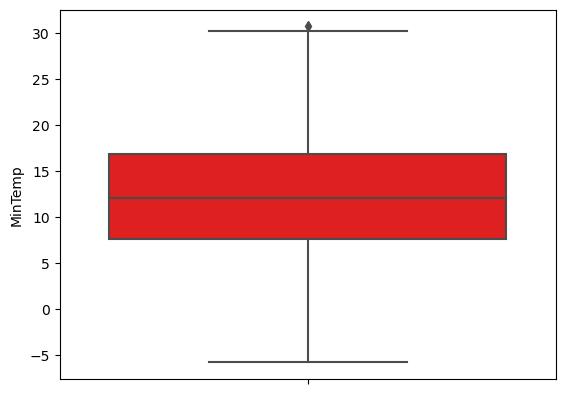

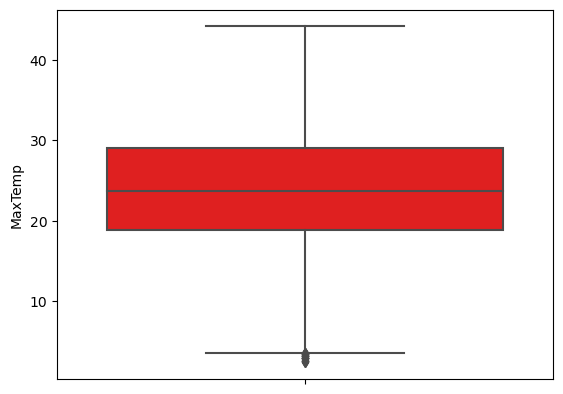

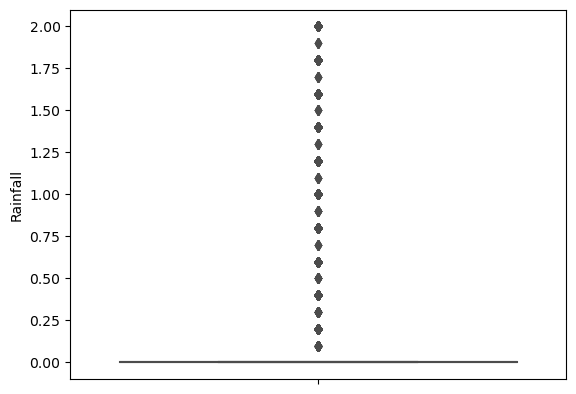

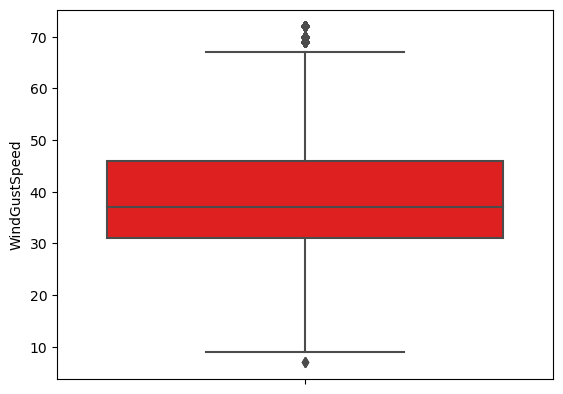

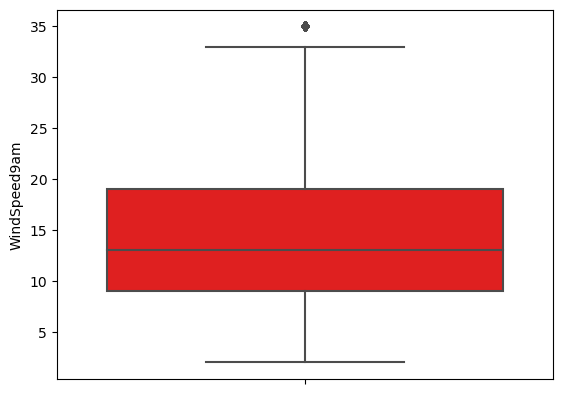

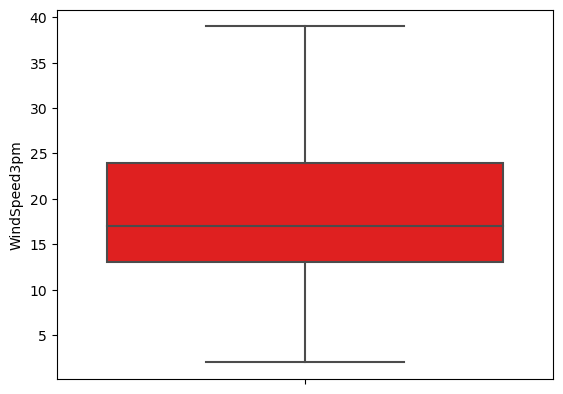

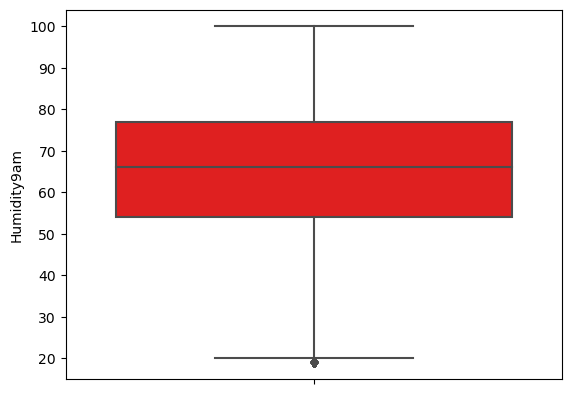

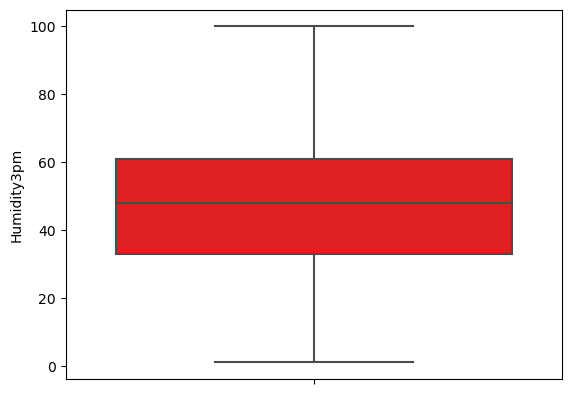

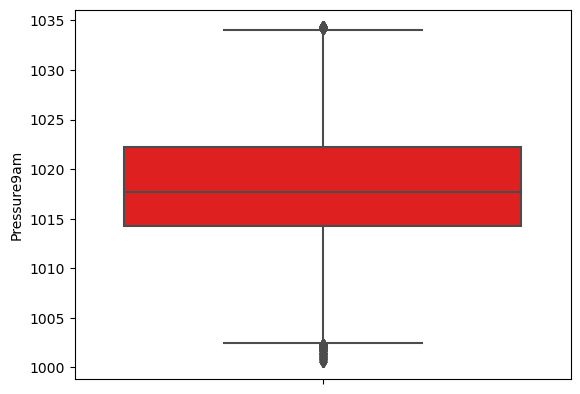

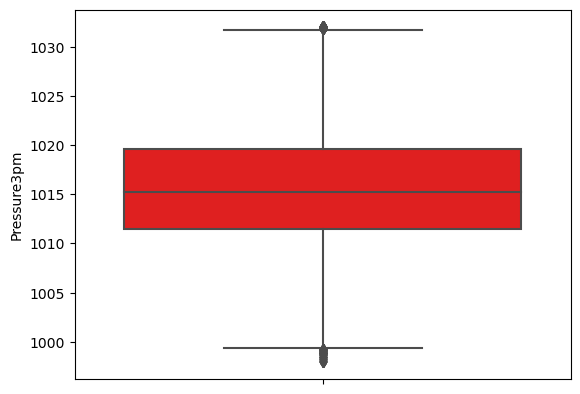

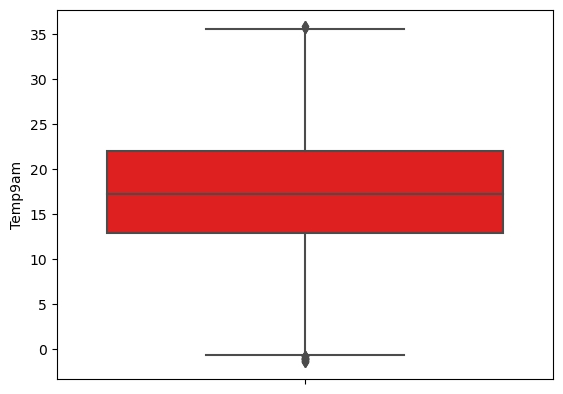

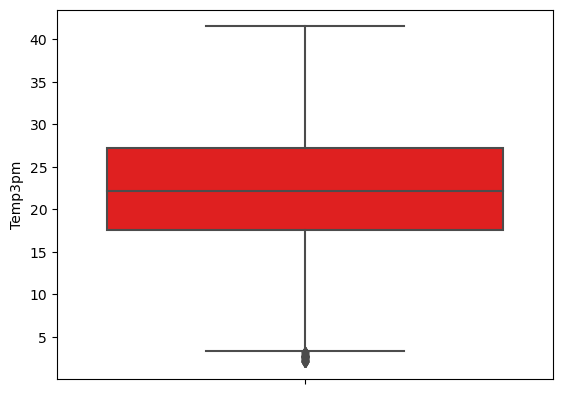

In [22]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i], color = 'red')
        plt.show();

In [23]:
null_prcent = df.isnull().mean()*100
null_prcent

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [24]:
df.shape

(94666, 19)

In [25]:
df['RainTomorrow'].value_counts()

No     79995
Yes    14671
Name: RainTomorrow, dtype: int64

In [26]:
le = LabelEncoder()

In [27]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(col)

Date
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [28]:
columns_to_encode = ['Date',
'Location',
'WindGustDir',
'WindDir9am',
'WindDir3pm',
'RainToday',
'RainTomorrow']
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

## splitting into x & y

In [29]:
x = df.drop('RainTomorrow',axis=1).values
y = df['RainTomorrow'].values

In [30]:
x.shape

(94666, 18)

In [31]:
y.shape

(94666,)

## SCALING

In [32]:
sc = StandardScaler()

In [33]:
x = sc.fit_transform(x)

## Cross validation

In [ ]:
models={'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    }

In [35]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=5, n_jobs=-1)
    print("cross validation model : {}".format(name))
    Average_score = np.mean(scores)
    print("Average score: ", Average_score)
    print("*"*100)

cross validation model : RandomForestClassifier
Average score:  0.853759342757157
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Average score:  0.765913583254903
****************************************************************************************************
cross validation model : SVC
Average score:  0.8693405935060536
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Average score:  0.8579214213384965
****************************************************************************************************
cross validation model : LogisticRegression
Average score:  0.8684110582562713
****************************************************************************************************
cross validation model : AdaBoostClassifier
Average score:  0.85975950753183
************************

### LogisticRegression has the best accuracy
### Now I am splitting the data to train and test sets using SKlearn library

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

## MODEL BUILDING

In [45]:
model = LogisticRegression()

In [46]:
model.fit(x_train,y_train)
print("model traines with {}".format(model))
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
print("training_score: ", training_score)
print("testing_score: ", testing_score)

model traines with LogisticRegression()
training_score:  87.16394654835472
testing_score:  86.8279285940636


In [47]:
y_predict = model.predict(x)

In [48]:
OUTPUT= pd.DataFrame(zip(y,y_predict), columns= ("ACTUAL", "PREDICTED"), dtype= float)
OUTPUT.sample(10)

,ACTUAL,PREDICTED
4338,0.0,0.0
40441,0.0,0.0
90511,0.0,0.0
26709,0.0,0.0
33952,0.0,0.0
62631,0.0,0.0
12740,0.0,0.0
79966,0.0,0.0
6325,0.0,0.0
11672,0.0,0.0


Model used is::  LogisticRegression()


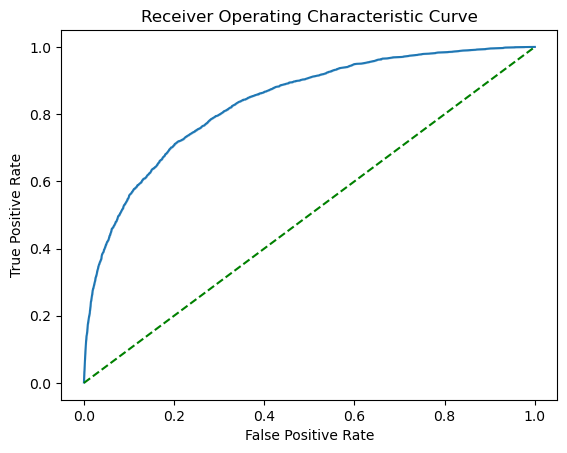

In [49]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

## ROC CURVE

In [42]:
## We can see that best model is Logistic Forest Classifier. Lets try Hyper parameter tune it.